# Predicting the Score based on the Study Hours 
### by Krishna Kumar

## Importing the important libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Importing the Dataset

In [2]:
## Reading data from a link
URL = "http://bit.ly/w-data"
df = pd.read_csv(URL)
print("Data imported")

Data imported


In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
## Checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

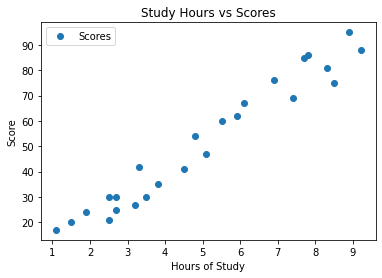

In [5]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style = 'o')  
plt.title('Study Hours vs Scores')  
plt.xlabel('Hours of Study')  
plt.ylabel('Score')  
plt.show()

#### From the above visualization we can see that there is a positive linear relation between the two variables.

## Separating the Target variable and the independent variable
#### Here Score is the target variable and Hours of study is the independent variable

In [6]:
## Y = df["Scores"]
## X = df["Hours"]
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


### Splitting the dataset into Train and Test sets

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Now we will fit the Linear Regression model to the Training set

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

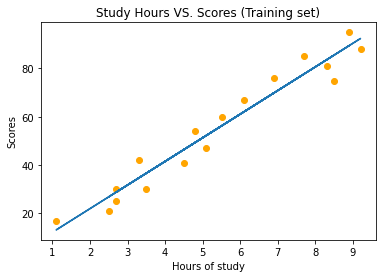

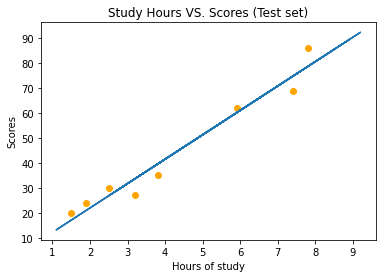

In [9]:
# Visualizing the Training set results
plt.scatter(X_train, Y_train, color = "orange")
plt.plot(X_train, reg.predict(X_train))
plt.title('Study Hours VS. Scores (Training set)')
plt.xlabel('Hours of study')
plt.ylabel('Scores')
plt.show()

# Visualizing the Test set results
plt.scatter(X_test, Y_test, color = "orange")
plt.plot(X_train, reg.predict(X_train))
plt.title('Study Hours VS. Scores (Test set)')
plt.xlabel('Hours of study')
plt.ylabel('Scores')
plt.show()

### Making Predictions

In [10]:
## Prediction of scores
y_pred = reg.predict(X_test)
y_pred
## Comparing the predicted values against the Actual values
df_comp = pd.DataFrame({'Actual': Y_test, 'Predicted':y_pred})
df_comp

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


#### There is a noticeable difference between the Actual and Predicted values

In [11]:
# Predicting the result of 9.25 hours/day
import numpy
a=numpy.array([9.25,])

In [12]:
pred = reg.predict([a])
print(pred)

[92.91505723]


### ** From the model created we can predict that a student studying for 9.25 hours is estimated to score around 92.9% **

### R2 Value

In [13]:
from sklearn.metrics import r2_score

In [15]:
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_pred))

Coefficient of determination: 0.96


### Evaluating the Model

In [ ]:
from sklearn.metrics import mean_squared_error  
import math

MSE = mean_squared_error(Y_test,y_pred)

RMSE = math.sqrt(MSE)
print("The Root Mean Squared Error is:",RMSE)

In [ ]:
y_pred1 = reg.predict(X_train)
MSE1 = mean_squared_error(Y_train,y_pred1)
RMSE = math.sqrt (MSE1)
print(RMSE)

#### The RMSE value is quite high. Upon comparing the RMSE values of the training and Test data we can see that the RMSE value of training data is higher than the test data. This can imply that there is a problem of Underfitting with the model we created.